In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [130]:
data = pd.read_csv('data/Graduate - IRISES dataset (2019-06).csv', sep='|')

# Preprocessing

### Data cleaning

Fast fixes after visual inspection:

In [131]:
#comma fix:
data['Petal.Width'] = pd.to_numeric(data['Petal.Width'].str.replace(',', '.'))

#negative values fix:
data.iloc[:, :-1] = data.iloc[:, :-1].abs()

#drop missing obs.:
data.iloc[:, :-1] = data.groupby('Species').transform(lambda x: x.fillna(x.mean()))

In [132]:
data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.059850,3.758000,1.199333
std,0.828066,0.433126,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [133]:
data['Species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: Species, dtype: int64

The distributions and class balance seem in order.

### Input preparation

In [134]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split


X = data.iloc[:, :-1]
y = data['Species']

X = StandardScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Models

## Random baseline

In [135]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.2631578947368421

## Linear Discriminant Analysis

In [136]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda.score(X_test, y_test)

0.9736842105263158

## Decision Tree

In [137]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier().fit(X_train, y_train)
tree.score(X_test, y_test)

0.9210526315789473

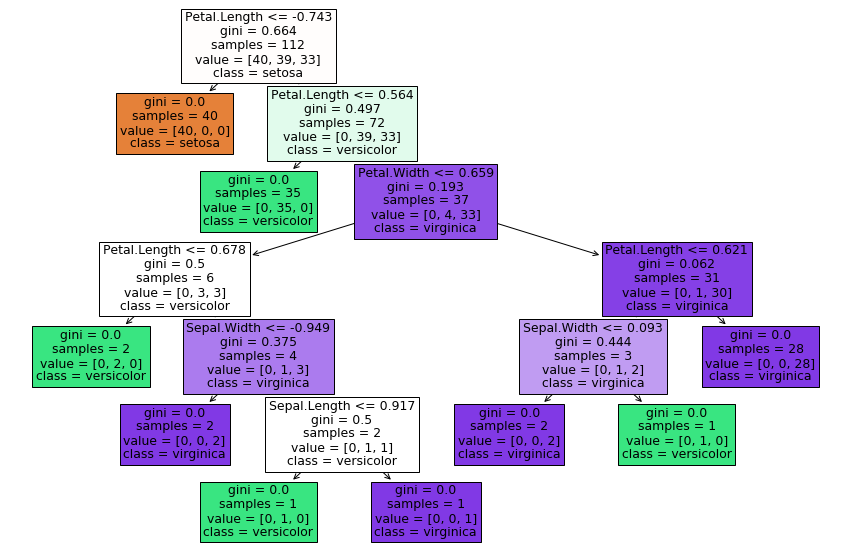

In [138]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(tree, filled=True, feature_names=data.columns[:-1], class_names = tree.classes_);